<a href="https://colab.research.google.com/github/briannabinder/AME508_finalproject/blob/main/AME508Project_ipynbLabel_file_path_%3D_'_content_drive_MyDrive_Colab_Notebooks_Project_Datasets_Train_Datasets_steth_20180814_09_37_11_label_txt'_with_open(Label_file_path%2C_'r')_as_file_label_lines_%3D_file_readlines()_Parse_labels_and_time_intervals_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, TensorDataset
from scipy import signal
from scipy.io import wavfile
import os

Drive mount from my personal driver

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Wav to spectrogram

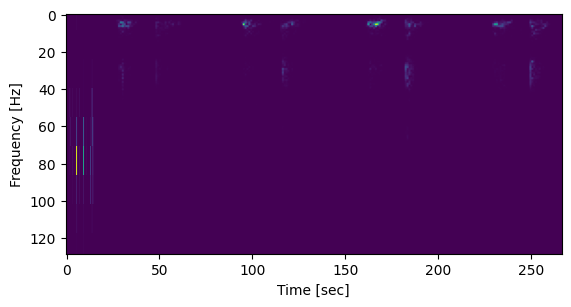

In [4]:
sample_rate, samples = wavfile.read('/content/drive/MyDrive/Colab_Notebooks/Project_Datasets/Train_Datasets/steth_20180814_09_37_11.wav')

frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

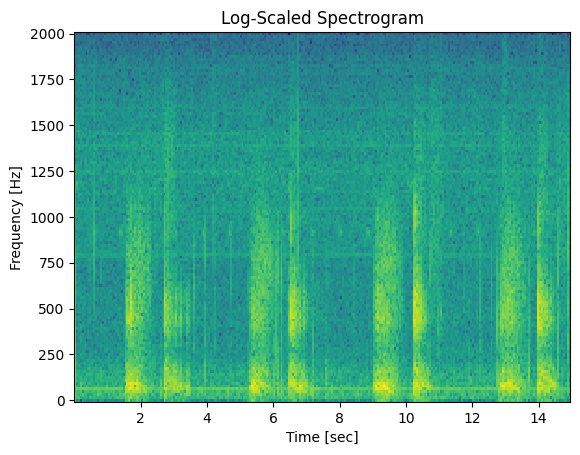

In [5]:
sample_rate, samples = wavfile.read('/content/drive/MyDrive/Colab_Notebooks/Project_Datasets/Train_Datasets/steth_20180814_09_37_11.wav')

frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

# Apply logarithmic transformation
log_spectrogram = 10 * np.log10(spectrogram)

# Plot the log-scaled spectrogram
plt.pcolormesh(times, frequencies, log_spectrogram, shading='auto')  # 'shading' argument for modern Matplotlib versions
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Log-Scaled Spectrogram')
plt.show()

Label Reader Mulit Hot Incoder


In [6]:
Label_file_path = '/content/drive/MyDrive/Colab_Notebooks/Project_Datasets/Train_Datasets/steth_20180814_09_37_11_label.txt'

with open(Label_file_path, 'r') as file:
    label_lines = file.readlines()

# Parse labels and time intervals
labels_and_intervals = []
for line in label_lines:
    parts = line.strip().split()
    if parts and parts[0] != 'D':  # Check if the line is not empty and doesn't start with 'D'
        label = parts[0]
        labels_and_intervals.append(label)

# Create multi-hot encoded vectors
multi_hot_encoded_matrix = []

# Specify the labels to encode
labels_to_encode = ['Wheeze', 'Stridor', 'Rhonchi', 'Crackles']

for label_row in labels_to_encode:
    # Create a row for each label
    row_vector = []
    for label_col in labels_to_encode:
        # Check if the label_col is in the labels_and_intervals
        if label_col in labels_and_intervals and label_col == label_row:
            multi_hot_vector = 1
        else:
            multi_hot_vector = 0

        row_vector.append(multi_hot_vector)

    multi_hot_encoded_matrix.append(row_vector)

# Print the multi-hot encoded matrix
print(labels_to_encode)
for row_vector in multi_hot_encoded_matrix:
    print(row_vector)


['Wheeze', 'Stridor', 'Rhonchi', 'Crackles']
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 0]


In [9]:
folder_path = '/content/drive/MyDrive/Colab_Notebooks/Project_Datasets/Train_Datasets'

# Get a list of all files in the folder
file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Specify the labels to encode
labels_to_encode = ['Wheeze', 'Stridor', 'Rhonchi', 'Crackles']

# List to store all multi-hot encoded matrices
all_multi_hot_matrices = []

# Iterate through each file
for file_name in file_list:
    if file_name.endswith('.txt'):  # Check if the file is a .txt file
        file_path = os.path.join(folder_path, file_name)

        # Read the content of the .txt file with different encodings
        for encoding in ['utf-8', 'latin-1', 'ISO-8859-1']:
            try:
                with open(file_path, 'r', encoding=encoding) as file:
                    label_lines = file.readlines()
                break  # Stop trying encodings if successful
            except UnicodeDecodeError:
                continue  # Try the next encoding if decoding fails

        # Parse labels and time intervals
        labels_and_intervals = []
        for line in label_lines:
            parts = line.strip().split()
            if parts and parts[0] != 'D':  # Check if the line is not empty and doesn't start with 'D'
                label = parts[0]
                labels_and_intervals.append(label)

        # Create multi-hot encoded matrix for the current file
        multi_hot_encoded_matrix = []

        for label_row in labels_to_encode:
            # Create a row for each label
            row_vector = []
            for label_col in labels_to_encode:
                # Check if the label_col is in the labels_and_intervals
                if label_col in labels_and_intervals and label_col == label_row:
                    multi_hot_vector = 1
                else:
                    multi_hot_vector = 0

                row_vector.append(multi_hot_vector)

            multi_hot_encoded_matrix.append(row_vector)

        # Append the multi-hot encoded matrix to the list
        all_multi_hot_matrices.append({
            'file_name': file_name,
            'matrix': multi_hot_encoded_matrix
        })

# Print or do further processing with all_multi_hot_matrices
for item in all_multi_hot_matrices:
    print(f"File: {item['file_name']}")
    print(labels_to_encode)
    for row_vector in item['matrix']:
        print(row_vector)
    print("\n" + "-" * 30 + "\n")

# Print the total count of files
print(f"Total count of files: {len(all_multi_hot_matrices)}")

Streaming output truncated to the last 5000 lines.
[0, 0, 0, 0]

------------------------------

File: trunc_2019-05-31-14-27-51-L2_11_label.txt
['Wheeze', 'Stridor', 'Rhonchi', 'Crackles']
[1, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]

------------------------------

File: trunc_2019-05-31-14-27-51-L4_5_label.txt
['Wheeze', 'Stridor', 'Rhonchi', 'Crackles']
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]

------------------------------

File: trunc_2019-05-31-14-27-51-L4_7_label.txt
['Wheeze', 'Stridor', 'Rhonchi', 'Crackles']
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]

------------------------------

File: trunc_2019-05-31-14-27-51-L2_1_label.txt
['Wheeze', 'Stridor', 'Rhonchi', 'Crackles']
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]

------------------------------

File: trunc_2019-05-31-14-27-51-L2_2_label.txt
['Wheeze', 'Stridor', 'Rhonchi', 'Crackles']
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]

------------------------------

File: trunc_2019-